<a href="https://colab.research.google.com/github/lerdeljan17/Bioinformatics-Project1/blob/main/Projekat1_bioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysam
!pip install matplotlib

     |████████████████████████████████| 9.9MB 10.6MB/s 


In [ ]:

!gunzip /content/drive/My\ Drive/Bioinformatika/Projekat1/experiment_13.vcf.gz

gzip: /content/drive/My Drive/Bioinformatika/Projekat1/experiment_13.vcf.gz: No such file or directory


In [ ]:
import pysam
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import chisquare
 
vcf = pysam.VariantFile('/content/drive/My Drive/Bioinformatika/Projekat1/experiment_13.vcf')

print('ukupno slucajeva u studiji ',len(list(vcf.header.samples)))

bolesni = {x for x in vcf.header.samples if x.startswith('case')}
zdravi = {x for x in vcf.header.samples if x.startswith('control')}
print('zdravih ima: {0}, a bolesnih ima: {1}'.format(len(zdravi),len(bolesni)))

"""
for variant in vcf.fetch():
 print(variant.chrom, variant.pos, variant.ref, variant.alts)
 break
"""
totalMutations=0
mutationsPerChrom = 0
table = dict()
chrom = None
"""
for variant in vcf.fetch():
  for sample in variant.samples:
    data = variant.samples[sample]
    if data['GT'][0] == 1 or data['GT'][1] == 1:
      totalMutations+=1
      if chrom == None:
        chrom = variant.chrom
      if variant.chrom == chrom and chrom != None:
        mutationsPerChrom+=1
      if variant.chrom != chrom and chrom != None:
        print("hromozom broj {0} ima mutacija: {1}".format(chrom,mutationsPerChrom))
        table[chrom] = mutationsPerChrom
        mutationsPerChrom=1
        chrom = variant.chrom
  #chrom = variant.chrom
print("hromozom broj {0} ima mutacija: {1}".format(chrom,mutationsPerChrom))
table[chrom] = mutationsPerChrom
print(table)
print('ukupno mutacija ima: {0}'.format(totalMutations))
"""
for variant in vcf.fetch():
  totalMutations+=1
  if chrom == None:
    chrom = variant.chrom
  if variant.chrom == chrom and chrom != None:
      mutationsPerChrom+=1
  if variant.chrom != chrom and chrom != None:
    print("hromozom broj {0} ima mutacija: {1}".format(chrom,mutationsPerChrom))
    table[chrom] = mutationsPerChrom
    mutationsPerChrom=1
    chrom = variant.chrom
print("hromozom broj {0} ima mutacija: {1}".format(chrom,mutationsPerChrom))
table[chrom] = mutationsPerChrom
print(table)
print('ukupno mutacija ima: {0}'.format(totalMutations))



FileNotFoundError: ignored

In [ ]:
print(list(vcf.header.samples))

['case_0', 'case_1', 'case_2', 'case_3', 'case_4', 'case_5', 'case_6', 'case_7', 'case_8', 'case_9', 'case_10', 'case_11', 'case_12', 'case_13', 'case_14', 'case_15', 'case_16', 'case_17', 'case_18', 'case_19', 'case_20', 'case_21', 'case_22', 'case_23', 'case_24', 'case_25', 'case_26', 'case_27', 'case_28', 'case_29', 'case_30', 'case_31', 'case_32', 'case_33', 'case_34', 'case_35', 'case_36', 'case_37', 'case_38', 'case_39', 'case_40', 'case_41', 'case_42', 'case_43', 'case_44', 'case_45', 'case_46', 'case_47', 'case_48', 'case_49', 'case_50', 'case_51', 'case_52', 'case_53', 'case_54', 'case_55', 'case_56', 'case_57', 'case_58', 'case_59', 'case_60', 'case_61', 'case_62', 'case_63', 'case_64', 'case_65', 'case_66', 'case_67', 'case_68', 'case_69', 'case_70', 'case_71', 'case_72', 'case_73', 'case_74', 'case_75', 'case_76', 'case_77', 'case_78', 'case_79', 'case_80', 'case_81', 'case_82', 'case_83', 'case_84', 'case_85', 'case_86', 'case_87', 'case_88', 'case_89', 'case_90', 'case_91

In [ ]:
#counts = Counter([sum(sample['GT']) for sample in variant.samples.values() if None not in sample['GT']])
#counts = Counter([sum(sample['GT']) for sample in varinat.samples.values() if sample.values() = (0,0)])
homoZigR = 0
homoZigA = 0
heteroZig = 0
ref = 0
alt = 0
homoZigRPM = []
homoZigAPM = []
heteroZigPM = []
maf = []
for variant in vcf.fetch():
  for sample in variant.samples:
    data = variant.samples[sample]
    if data['GT'][0] == 0 and data['GT'][1] == 0:
      homoZigR += 1
      ref += 2
    if data['GT'] == (1,1):
      homoZigA += 1
      alt += 2
    if data['GT'] == (0,1) or data['GT'] == (1,0):
      heteroZig += 1
      ref += 1
      alt += 1
  homoZigAPM.append(homoZigA/200)
  homoZigRPM.append(homoZigR/200)
  heteroZigPM.append(heteroZig/200)
  maf.append(min(alt/(ref+alt),ref/(ref+alt)))
  alt = 0
  ref = 0
  homoZigR = 0 
  heteroZig = 0
  homoZigA = 0



(array([196900., 122630., 121432., 134313., 133258., 156282., 237613.,
        206125.,  31931.,    340.]),
 array([0.    , 0.0665, 0.133 , 0.1995, 0.266 , 0.3325, 0.399 , 0.4655,
        0.532 , 0.5985, 0.665 ]),
 <a list of 10 Patch objects>)

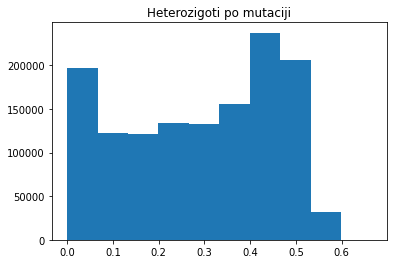

In [ ]:
plt.title('Heterozigoti po mutaciji')
plt.hist(heteroZigPM)

(array([714476., 168525., 109628.,  72235.,  60327.,  51379.,  40684.,
         32255.,  29234.,  62081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

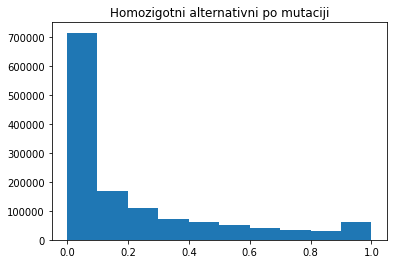

In [ ]:
plt.title('Homozigotni alternativni po mutaciji')
plt.hist(homoZigAPM)

(array([229583., 113683., 108521.,  96878., 104070., 114629., 116072.,
        120769., 140933., 195686.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

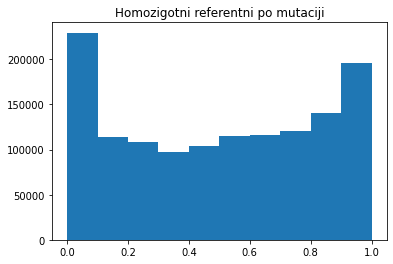

In [ ]:
plt.title('Homozigotni referentni po mutaciji')
plt.hist(homoZigRPM)

(array([244786., 159150., 149285., 123270., 122188., 120217., 109606.,
        101338., 105247., 105737.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

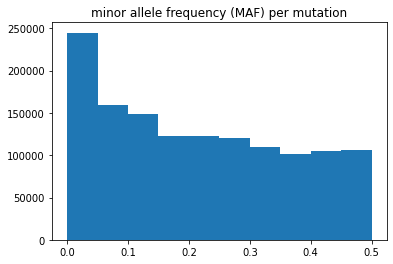

In [ ]:
plt.title('minor allele frequency (MAF) per mutation')
plt.hist(maf)

In [ ]:
#f-ja koja radi hi-kvadrat test
def run_chi2(variant):
  case_refs = sum(1 for sample in bolesni for gt in variant.samples[sample]['GT'] if gt==0)
  case_alts = sum(1 for sample in bolesni for gt in variant.samples[sample]['GT'] if gt==1)
  control_refs = sum(1 for sample in zdravi for gt in variant.samples[sample]['GT'] if gt==0)
  control_alts = sum(1 for sample in zdravi for gt in variant.samples[sample]['GT'] if gt==1)

  total = case_refs + case_alts + control_refs + control_alts
  
  expected = [(case_refs+case_alts)*(case_refs+control_refs)/total,
              (control_refs+control_alts)*(case_refs+control_refs)/total,
              (case_refs+case_alts)*(case_alts+control_alts)/total,
              (control_refs+control_alts)*(case_alts+control_alts)/total]

  return chisquare([case_refs, control_refs, case_alts, control_alts], expected).pvalue

In [ ]:
chi2 = [(variant.chrom, variant.pos, run_chi2(variant)) for variant in vcf.fetch()]
#print(chi2)
#hi-kvadrat test
#chi2 = [(variant.chrom, variant.pos, run_chi2(variant)/totalMutations) for variant in vcf.fetch()]
#print(chi2)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


In [ ]:
print(chi2[:10])
from itertools import groupby

results = {key: list(value) for key, value in groupby(chi2, key=lambda x: x[0])}
#pakovanje u hes mapu

[('1', 740857, nan), ('1', 750235, 0.4389922634641896), ('1', 768448, 0.9904714988255228), ('1', 769551, 0.9858808798960282), ('1', 776546, 0.6488337974210441), ('1', 780027, nan), ('1', 780785, 0.9733964149670882), ('1', 784023, 0.9858808798960282), ('1', 792480, nan), ('1', 798026, 0.9214322830304281)]


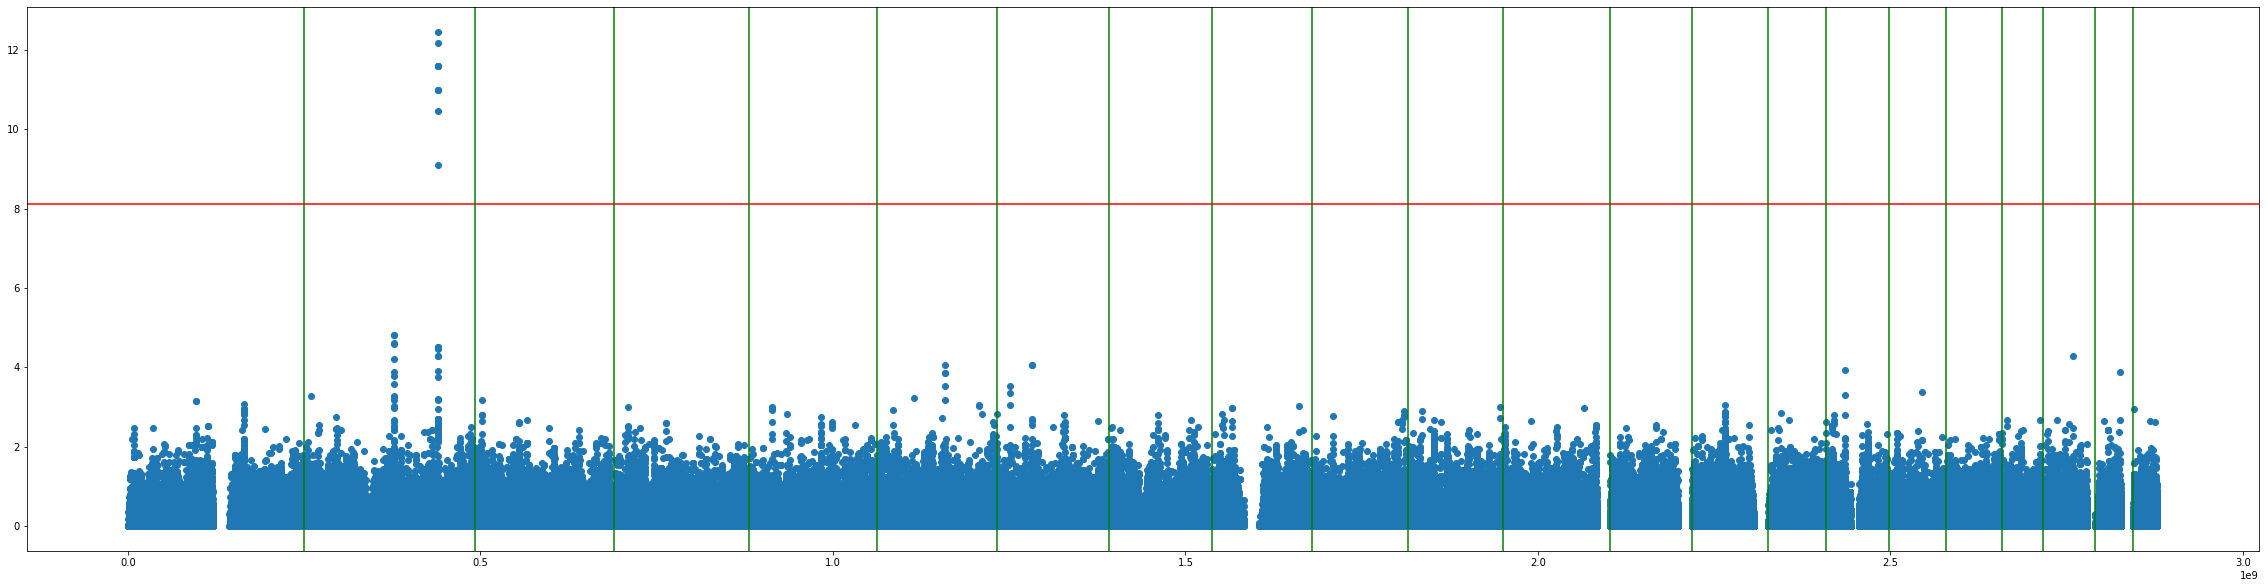

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(40, 10))
positions = [i[1] for i in chi2]
pozicije = [0] * totalMutations
ch = 1
summ = 0
for i in range(len(positions)):

  if i == summ + table.get(str(ch)):

    summ += table.get(str(ch))
    ch+=1


  if ch == 1:
    toAdd = 0
  else:  

    toAdd = pozicije[summ-1]
  pozicije[i] = positions[i] + toAdd

pvalues = [-np.log10(i[2]) for i in chi2]
plt.scatter(pozicije,pvalues)
plt.axhline(-np.log10(0.01/totalMutations), c='r')

suma= 0
for i in range(1,22):
  suma += table.get(str(i))
  vLine = pozicije[suma]
  plt.axvline(x=vLine,c='g')


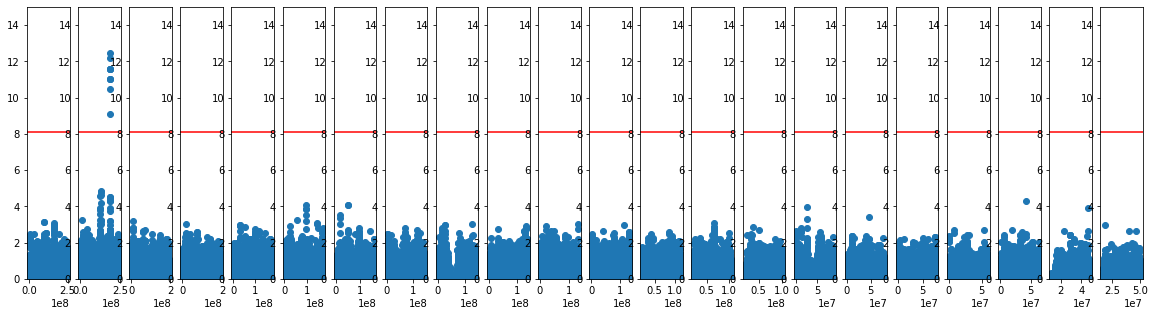

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#print(results.get("1")[:10])
fig = plt.figure(figsize=(20, 5))

for i, chrom in enumerate(results):
  ax = fig.add_subplot(1, 22, i+1)
  pos = [x[1] for x in results[chrom]]
  p = [-np.log10(x[2]) for x in results[chrom]]
      ax.scatter(pos, p)
      ax.set_ylim(0, 15)
      ax.axhline(-np.log10(0.01/totalMutations), c='r')


In [ ]:
#Hardi-Vajnberg test
from collections import Counter

def check_hwe(variant):
  counts = Counter([sum(sample['GT']) for sample in variant.samples.values() if None not in sample['GT']])
  total = sum(counts.values())
  p = (2*counts[0]+counts[1])/(2*total)
  q = (2*counts[2]+counts[1])/(2*total)

  observed = [counts[0], counts[1], counts[2]]
  expected = [p*p*total, 2*p*q*total, q*q*total]

  return chisquare(observed, expected, ddof=1).pvalue

In [ ]:
#statistički značajno asocirane mutacije sa datom bolešću (p manje od 0.05)
chi2_filtered = [chi for chi in chi2 if chi[2] < 0.05/totalMutations]

In [ ]:
#Hardi-Vajnberg ekvilibrijum
import itertools
print (chi2_filtered)
print(len(chi2_filtered))
hwe_fail = [check_hwe(variant) < 1e-6 for variant in vcf.fetch()]
# print(hwe_fail[:10])
chi2_hweFalse = [chi for chi, hwe in itertools.zip_longest(chi2, hwe_fail) if not hwe and chi[2] < 0.05/totalMutations]
# chi2_hweTrue = [chi for chi, hwe in itertools.zip_longest(chi2, hwe_fail) if hwe and chi[2] < 0.05/totalMutations]
print(chi2_hweFalse)
# print(chi2_hweTrue)

[('2', 190900715, 3.521239721934948e-13), ('2', 190901839, 2.57983519196747e-12), ('2', 190905698, 3.4492004405323885e-11), ('2', 190908099, 6.869773256254468e-13), ('2', 190916229, 9.967848167007183e-12), ('2', 190918038, 9.967848167007183e-12), ('2', 190921491, 2.57983519196748e-12), ('2', 190925077, 2.57983519196748e-12), ('2', 190925291, 7.986175624913923e-10), ('2', 190926110, 9.967848167007183e-12), ('2', 190931706, 2.57983519196748e-12)]
11


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


[('2', 190900715, 3.521239721934948e-13), ('2', 190901839, 2.57983519196747e-12), ('2', 190905698, 3.4492004405323885e-11), ('2', 190908099, 6.869773256254468e-13), ('2', 190916229, 9.967848167007183e-12), ('2', 190918038, 9.967848167007183e-12), ('2', 190921491, 2.57983519196748e-12), ('2', 190925077, 2.57983519196748e-12), ('2', 190925291, 7.986175624913923e-10), ('2', 190926110, 9.967848167007183e-12), ('2', 190931706, 2.57983519196748e-12)]


In [ ]:
#print(chi2_final[:10])
#print(hwe_fail[:10])
# results_final = {key: list(value) for key, value in groupby(chi2_final, key=lambda x: x[0])}
# print(len(chi2_filtered),len(hwe_fail),len(chi2_final))
#print(results_final.get("1")[:10])
# mutation = min(chi2_hweFalse, key=lambda x:x[2])
mutation = min(chi2_filtered, key=lambda x:x[2])
print(mutation)
#MSTN(myostatin) u blizini
#https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg19&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr2%3A190850715%2D190950714&hgsid=834246781_Ap8k2krXGuAu1FmmWwWCNs1Py1F1
#Description: Homo sapiens myostatin (MSTN), mRNA.
#https://genome.ucsc.edu/cgi-bin/hgGene?hgg_gene=uc002urp.3&hgg_prot=uc002urp.3&hgg_chrom=chr2&hgg_start=190920425&hgg_end=190927455&hgg_type=knownGene&db=hg19&c=chr2&l=190850714&r=190950714


('2', 190900715, 3.521239721934948e-13)


Gonzalez-Cadavid et al. (1998) examined the hypothesis that myostatin expression correlates inversely with fat-free mass in humans and that increased expression of the myostatin gene is associated with weight loss in men with AIDS wasting syndrome. They examined the expression of myostatin in skeletal muscle and serum of healthy and HIV-infected men. The serum and intramuscular concentrations of myostatin-immunoreactive protein were increased in HIV-infected men with weight loss compared with healthy men and correlated inversely with fat-free mass index. 

Zimmers et al. (2002) demonstrated that myostatin is synthesized as a preprotein activated by 2 proteolytic cleavages. Removal of the signal sequence is followed by cleavage at a tetrabasic processing site, resulting in a 26-kD amino-terminal propeptide and a 12.5-kD carboxy-terminal peptide, a dimer of which is the biologically active portion of the protein. Zimmers et al. (2002) demonstrated that myostatin circulates in the blood of adult mice in a latent form that can be activated by acid treatment, similar to TGF-beta. Systemic overexpression of myostatin in adult mice was found to induce profound muscle and fat loss without diminution of nutrient intake. This is similar to that seen in human cachexia syndromes, and suggests that myostatin may be a useful pharmacologic target in clinical settings such as cachexia, where muscle growth is desired. 

https://omim.org/entry/601788?search=mstn&highlight=mstn#geneFunction